In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv("cars.csv")

df.head()

,Unnamed: 0,이름,차량번호,링크,연식,주행거리,연료,배기량,색상,보증정보,...,보험이력등록,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_내차피해(가격).1
0,0,현대 그랜저HG 300 LPi 프리미엄,차량번호 59서2874,https://www.bobaedream.co.kr/mycar/mycar_view....,2012.06,"128,383 km",LPG,"2,999 cc (235마력)",회색,만료,...,등록,3.0,0.0,0.0,0.0,0.0,2.0,"1,797,258",0.0,0
1,1,현대 그랜저HG 하이브리드 2.4 HEV 프리미엄,차량번호 48누1487,https://www.bobaedream.co.kr/mycar/mycar_view....,2015.03,"229,350 km",가솔린 하이브리드,"2,359 cc (199마력)",검정색,만료,...,등록,3.0,0.0,0.0,0.0,0.0,4.0,"8,129,148",0.0,0
2,2,현대 그랜저HG 220 디젤 프리미엄,차량번호 53더1632,https://www.bobaedream.co.kr/mycar/mycar_view....,2015.01,"115,435 km",디젤,"2,199 cc (202마력)",검정색,만료,...,등록,1.0,0.0,0.0,0.0,0.0,2.0,"916,288",1.0,"1,356,217"
3,3,현대 그랜저HG 300 LPi,차량번호 13부9685,https://www.bobaedream.co.kr/mycar/mycar_view....,2012.01,"93,858 km",LPG,"2,999 cc (235마력)",검정색,만료,...,등록,2.0,0.0,0.0,0.0,0.0,5.0,"5,986,356",0.0,0
4,4,현대 그랜저HG 하이브리드 2.4 HEV 프리미엄,차량번호 28마0837,https://www.bobaedream.co.kr/mycar/mycar_view....,2016.09 (17년형),"98,564 km",가솔린 하이브리드,"2,359 cc (199마력)",은색,만료,...,등록,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1077 non-null   int64  
 1   이름             1077 non-null   object 
 2   차량번호           1077 non-null   object 
 3   링크             1077 non-null   object 
 4   연식             1077 non-null   object 
 5   주행거리           1077 non-null   object 
 6   연료             1077 non-null   object 
 7   배기량            1077 non-null   object 
 8   색상             1077 non-null   object 
 9   보증정보           1077 non-null   object 
 10  가격             1077 non-null   object 
 11  신차대비가격         1077 non-null   object 
 12  옵션_선루프         811 non-null    object 
 13  옵션_파노라마선루프     811 non-null    object 
 14  옵션_열선앞         811 non-null    object 
 15  옵션_열선뒤         811 non-null    object 
 16  옵션_전방센서        811 non-null    object 
 17  옵션_후방센서        811 non-null    object 
 18  옵션_전방캠  

In [4]:
df.shape

(1077, 32)

In [5]:
df.describe()

,Unnamed: 0,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),사고상세_타차가해(횟수)
count,1077.000000,558.000000,558.000000,558.0,558.0,558.0,558.000000,558.000000
mean,538.000000,2.349462,0.008961,0.0,0.0,0.0,1.899642,1.232975
std,311.047424,1.889618,0.094320,0.0,0.0,0.0,2.169803,1.624384
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,269.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,538.000000,2.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000
75%,807.000000,3.000000,0.000000,0.0,0.0,0.0,2.000000,2.000000
max,1076.000000,9.000000,1.000000,0.0,0.0,0.0,16.000000,11.000000


In [6]:
df.describe(include = "object")

,이름,차량번호,링크,연식,주행거리,연료,배기량,색상,보증정보,가격,...,옵션_열선뒤,옵션_전방센서,옵션_후방센서,옵션_전방캠,옵션_후방캠,옵션_어라운드뷰,옵션_네비순정,보험이력등록,보험_내차피해(가격),보험_내차피해(가격).1
count,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,...,811,811,811,811,811,811,811,1077,558,558
unique,504,761,805,265,703,7,91,38,5,385,...,2,2,2,2,2,2,2,2,257,203
top,기아 카니발 4세대 3.5 가솔린 하이리무진 -,차량번호 번호판없음,https://www.bobaedream.co.kr/mycar/mycar_view....,2023.00,10 km,가솔린,"2,497 cc ()",흰색,만료,0원,...,유,유,유,무,유,무,유,등록,0,0
freq,70,51,2,51,24,635,113,404,322,39,...,501,454,717,537,702,539,539,756,167,248


# 전처리

### 연관없는 컬럼삭제 / 데이터타입 변경 및 단위 정리

In [7]:
# 분석에 연관없는 이름, 차량번호, 링크 컬럼 삭제
df_dropped = df.drop(['이름', '차량번호', '링크'], axis = 1)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,보증정보,가격,신차대비가격,옵션_선루프,...,보험이력등록,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_내차피해(가격).1
0,0,2012.06,"128,383 km",LPG,"2,999 cc (235마력)",회색,만료,690만원,준비중,무,...,등록,3.0,0.0,0.0,0.0,0.0,2.0,"1,797,258",0.0,0
1,1,2015.03,"229,350 km",가솔린 하이브리드,"2,359 cc (199마력)",검정색,만료,770만원,20,유,...,등록,3.0,0.0,0.0,0.0,0.0,4.0,"8,129,148",0.0,0
2,2,2015.01,"115,435 km",디젤,"2,199 cc (202마력)",검정색,만료,999만원,29,무,...,등록,1.0,0.0,0.0,0.0,0.0,2.0,"916,288",1.0,"1,356,217"
3,3,2012.01,"93,858 km",LPG,"2,999 cc (235마력)",검정색,만료,"1,030만원",준비중,무,...,등록,2.0,0.0,0.0,0.0,0.0,5.0,"5,986,356",0.0,0
4,4,2016.09 (17년형),"98,564 km",가솔린 하이브리드,"2,359 cc (199마력)",은색,만료,"1,450만원",39,무,...,등록,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [8]:
# 연식 : 개월 수로 계산하여 입력
def changeyear(string):
  year=int(string[:4])
  month=int(string[5:7])
  n=12*(2023-year)+month
  return n
  
df_dropped['연식']=df_dropped['연식'].apply(changeyear)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,보증정보,가격,신차대비가격,옵션_선루프,...,보험이력등록,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_내차피해(가격).1
0,0,138,"128,383 km",LPG,"2,999 cc (235마력)",회색,만료,690만원,준비중,무,...,등록,3.0,0.0,0.0,0.0,0.0,2.0,"1,797,258",0.0,0
1,1,99,"229,350 km",가솔린 하이브리드,"2,359 cc (199마력)",검정색,만료,770만원,20,유,...,등록,3.0,0.0,0.0,0.0,0.0,4.0,"8,129,148",0.0,0
2,2,97,"115,435 km",디젤,"2,199 cc (202마력)",검정색,만료,999만원,29,무,...,등록,1.0,0.0,0.0,0.0,0.0,2.0,"916,288",1.0,"1,356,217"
3,3,133,"93,858 km",LPG,"2,999 cc (235마력)",검정색,만료,"1,030만원",준비중,무,...,등록,2.0,0.0,0.0,0.0,0.0,5.0,"5,986,356",0.0,0
4,4,93,"98,564 km",가솔린 하이브리드,"2,359 cc (199마력)",은색,만료,"1,450만원",39,무,...,등록,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [9]:
# 보험_내차피해(가격).1 : 보험_타차피해(가격)으로 컬럼명 변경
df_dropped = df_dropped.rename({'보험_내차피해(가격).1' : '보험_타차피해(가격)'}, axis = 'columns')

df_dropped.head(1)

,Unnamed: 0,연식,주행거리,연료,배기량,색상,보증정보,가격,신차대비가격,옵션_선루프,...,보험이력등록,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격)
0,0,138,"128,383 km",LPG,"2,999 cc (235마력)",회색,만료,690만원,준비중,무,...,등록,3.0,0.0,0.0,0.0,0.0,2.0,"1,797,258",0.0,0


In [10]:
# , 및 공백/단위 제거
# 주행거리
df_dropped['주행거리']=df_dropped['주행거리'].apply(lambda x:x.replace(",","")[:-2].rstrip())

# 배기량
def engine(str1):
    index=str1.find('cc')
    return str1[:index].replace(',','').rstrip()
df_dropped['배기량']=df_dropped['배기량'].apply(engine)

# 가격
df_dropped['가격']=df_dropped['가격'].apply(lambda x:x.replace('만','0000').replace(',','')[:-1])

# 보험_내차피해(가격)
df_dropped['보험_내차피해(가격)']=df_dropped['보험_내차피해(가격)'].apply(lambda x: x.replace(",","") if isinstance(x,str) else np.nan)

# 보험_타차피해(가격)
df_dropped['보험_타차피해(가격)']=df_dropped['보험_타차피해(가격)'].apply(lambda x: x.replace(",","") if isinstance(x,str) else np.nan)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,보증정보,가격,신차대비가격,옵션_선루프,...,보험이력등록,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격)
0,0,138,128383,LPG,2999,회색,만료,6900000,준비중,무,...,등록,3.0,0.0,0.0,0.0,0.0,2.0,1797258,0.0,0
1,1,99,229350,가솔린 하이브리드,2359,검정색,만료,7700000,20,유,...,등록,3.0,0.0,0.0,0.0,0.0,4.0,8129148,0.0,0
2,2,97,115435,디젤,2199,검정색,만료,9990000,29,무,...,등록,1.0,0.0,0.0,0.0,0.0,2.0,916288,1.0,1356217
3,3,133,93858,LPG,2999,검정색,만료,10300000,준비중,무,...,등록,2.0,0.0,0.0,0.0,0.0,5.0,5986356,0.0,0
4,4,93,98564,가솔린 하이브리드,2359,은색,만료,14500000,39,무,...,등록,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [11]:
# 연료 종류 확인하여 숫자로 변경
df_dropped["연료"].unique()

array(['LPG', '가솔린 하이브리드', '디젤', '가솔린', '가솔린/LPG겸용', '전기',
       '하이브리드(가솔린/전기)'], dtype=object)

In [12]:
matchfuel={'디젤':0, 'LPG':1, '가솔린':2, '가솔린 하이브리드': 3, '가솔린/LPG겸용' : 4, '전기': 5, '하이브리드(가솔린/전기)' : 6}
df_dropped['연료']=df_dropped['연료'].replace(matchfuel)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,보증정보,가격,신차대비가격,옵션_선루프,...,보험이력등록,소유자변경횟수,사고상세_전손,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격)
0,0,138,128383,1,2999,회색,만료,6900000,준비중,무,...,등록,3.0,0.0,0.0,0.0,0.0,2.0,1797258,0.0,0
1,1,99,229350,3,2359,검정색,만료,7700000,20,유,...,등록,3.0,0.0,0.0,0.0,0.0,4.0,8129148,0.0,0
2,2,97,115435,0,2199,검정색,만료,9990000,29,무,...,등록,1.0,0.0,0.0,0.0,0.0,2.0,916288,1.0,1356217
3,3,133,93858,1,2999,검정색,만료,10300000,준비중,무,...,등록,2.0,0.0,0.0,0.0,0.0,5.0,5986356,0.0,0
4,4,93,98564,3,2359,은색,만료,14500000,39,무,...,등록,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [13]:
# 편한데이터 활용을위해 보증여부/보증기간/보증거리 컬럼 추가
# 보증정보 : 만료/불가 -> 보증여부/보증기간/보증거리 컬럼모두 0 입력
#            정보없음 -> 보증이 없어서 정보가 없을 것이라는 판단하에 보증여부/보증기간/보증거리 컬럼모두 0 입력
#            그외 -> 보증여부/보증기간/보증거리 컬럼에 각각 1, 개월 수, 거리 계산하여 입력
# 보증정보 컬럼 삭제
def guar(str1):
    if str1=='만료' or str1=='불가':
        return pd.Series([0,0,0])
    elif str1=='정보없음':
        return pd.Series([0,0,0])
    else:
        index=str1.find('/')
        if index==-1:
            time=0
        else:
            time=int(str1[:index-3].strip())
        km=str1[index+1:].replace(",","")[:-2].strip()
        return pd.Series([1,time,km])
guartable=df_dropped['보증정보'].apply(guar)
guartable.columns=['보증여부','보증기간','보증거리']
df_dropped=pd.concat([df_dropped,guartable],axis=1)
df_dropped=df_dropped.drop(['보증정보'],axis=1)

In [14]:
df_dropped.head(10)

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,0,138,128383,1,2999,회색,6900000,준비중,무,무,...,0.0,0.0,0.0,2.0,1797258,0.0,0,0,0,0
1,1,99,229350,3,2359,검정색,7700000,20,유,유,...,0.0,0.0,0.0,4.0,8129148,0.0,0,0,0,0
2,2,97,115435,0,2199,검정색,9990000,29,무,무,...,0.0,0.0,0.0,2.0,916288,1.0,1356217,0,0,0
3,3,133,93858,1,2999,검정색,10300000,준비중,무,무,...,0.0,0.0,0.0,5.0,5986356,0.0,0,0,0,0
4,4,93,98564,3,2359,은색,14500000,39,무,무,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
5,5,29,22500,2,2497,흰색,29300000,86,무,무,...,0.0,0.0,0.0,2.0,250000,1.0,1428690,0,0,0
6,6,46,135027,2,2497,청색,26990000,65,무,무,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000
7,7,79,191426,3,2359,검정색,17990000,45,무,무,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
8,8,98,149930,2,2359,회색,7700000,25,유,무,...,0.0,0.0,0.0,2.0,1265939,1.0,608081,0,0,0
9,9,54,51558,2,2359,흰색,19400000,62,유,무,...,0.0,0.0,0.0,1.0,1002224,0.0,0,1,60,100000


In [15]:
# 옵션 컬럼: 무 -> 0 / 유 -> 1 로 변경
matchop={'무':0,'유':1}
df_dropped=df_dropped.replace(matchop)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,0,138,128383,1,2999,회색,6900000,준비중,0.0,0.0,...,0.0,0.0,0.0,2.0,1797258,0.0,0,0,0,0
1,1,99,229350,3,2359,검정색,7700000,20,1.0,1.0,...,0.0,0.0,0.0,4.0,8129148,0.0,0,0,0,0
2,2,97,115435,0,2199,검정색,9990000,29,0.0,0.0,...,0.0,0.0,0.0,2.0,916288,1.0,1356217,0,0,0
3,3,133,93858,1,2999,검정색,10300000,준비중,0.0,0.0,...,0.0,0.0,0.0,5.0,5986356,0.0,0,0,0,0
4,4,93,98564,3,2359,은색,14500000,39,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0


In [16]:
# 보험이력등록 : 미등록 -> 0 / 등록 -> 1 로 변경
insurinfo={'미등록':0,'등록':1}
df_dropped['보험이력등록']=df_dropped['보험이력등록'].replace(insurinfo)
df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,0,138,128383,1,2999,회색,6900000,준비중,0.0,0.0,...,0.0,0.0,0.0,2.0,1797258,0.0,0,0,0,0
1,1,99,229350,3,2359,검정색,7700000,20,1.0,1.0,...,0.0,0.0,0.0,4.0,8129148,0.0,0,0,0,0
2,2,97,115435,0,2199,검정색,9990000,29,0.0,0.0,...,0.0,0.0,0.0,2.0,916288,1.0,1356217,0,0,0
3,3,133,93858,1,2999,검정색,10300000,준비중,0.0,0.0,...,0.0,0.0,0.0,5.0,5986356,0.0,0,0,0,0
4,4,93,98564,3,2359,은색,14500000,39,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0


In [17]:
# 신차대비가격 : 준비중 -> 결측치로 변경
df_dropped['신차대비가격']=df_dropped['신차대비가격'].apply(lambda x: np.nan if x=='준비중' else x)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,0,138,128383,1,2999,회색,6900000,NaN,0.0,0.0,...,0.0,0.0,0.0,2.0,1797258,0.0,0,0,0,0
1,1,99,229350,3,2359,검정색,7700000,20,1.0,1.0,...,0.0,0.0,0.0,4.0,8129148,0.0,0,0,0,0
2,2,97,115435,0,2199,검정색,9990000,29,0.0,0.0,...,0.0,0.0,0.0,2.0,916288,1.0,1356217,0,0,0
3,3,133,93858,1,2999,검정색,10300000,NaN,0.0,0.0,...,0.0,0.0,0.0,5.0,5986356,0.0,0,0,0,0
4,4,93,98564,3,2359,은색,14500000,39,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0


In [18]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1077 non-null   int64  
 1   연식             1077 non-null   int64  
 2   주행거리           1077 non-null   object 
 3   연료             1077 non-null   int64  
 4   배기량            1077 non-null   object 
 5   색상             1077 non-null   object 
 6   가격             1077 non-null   object 
 7   신차대비가격         646 non-null    object 
 8   옵션_선루프         811 non-null    float64
 9   옵션_파노라마선루프     811 non-null    float64
 10  옵션_열선앞         811 non-null    float64
 11  옵션_열선뒤         811 non-null    float64
 12  옵션_전방센서        811 non-null    float64
 13  옵션_후방센서        811 non-null    float64
 14  옵션_전방캠         811 non-null    float64
 15  옵션_후방캠         811 non-null    float64
 16  옵션_어라운드뷰       811 non-null    float64
 17  옵션_네비순정        811 non-null    float64
 18  보험이력등록  

In [19]:
# 가격 컬럼에 숫자가 아닌 "[계약" 이라고 적혀있는 데이터 확인 및 대체불가능으로 판단하여 행 삭제
df_1 = df_dropped[df_dropped['가격'] == '[계약']
df_1

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
191,191,68,97000,0,2497,검정투톤,[계약,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
192,192,177,284013,0,2497,은색,[계약,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
197,197,155,154082,0,2497,갈색,[계약,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
286,286,41,40000,2,1598,회색 (아마존 그레이),[계약,68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000
393,393,98,77200,0,2497,흰색투톤,[계약,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
396,396,52,20585,0,2497,흰색,[계약,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
740,740,17,7300,2,3470,검정색,[계약,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000
873,873,91,58000,2,3342,검정색,[계약,38,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
887,887,91,58000,2,3342,검정색,[계약,38,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1017,1017,151,109260,2,3342,검정색,[계약,22,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [20]:
df_dropped.drop(df_dropped[df_dropped['가격'] == '[계약'].index, inplace = True)

In [21]:
# 신차대비가격 컬럼에 숫자가 아닌 "소유", "반납", "운용"이라고 적혀있는 데이터 확인 및 대체불가능으로 판단하여 행 삭제

In [22]:
df_1 = df_dropped[df_dropped['신차대비가격'] == '소유']
df_1

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
52,52,4,10,3,1598,흰색,0,소유,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
53,53,9,10,3,1598,흰색,0,소유,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
55,55,28,54800,2,2497,진청색,0,소유,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
56,56,33,51900,1,2999,검정색,0,소유,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
79,79,23,30000,2,2497,흰색,4000000,소유,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1,60,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,937,11,10,2,1999,흰색,0,소유,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1046,1046,34,74000,2,3778,흰색,7500000,소유,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1,60,100000
1048,1048,6,650,2,3778,흰색,3000000,소유,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000
1066,1066,34,74000,2,3778,흰색,7500000,소유,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,1,60,100000


In [23]:
df_1 = df_dropped[df_dropped['신차대비가격'] == '반납']
df_1

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
287,287,13,43308,3,1580,기타색상,0,반납,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000
465,465,8,2500,2,2497,흰색,0,반납,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000


In [24]:
df_1 = df_dropped[df_dropped['신차대비가격'] == '운용']
df_1

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
746,746,1,19000,2,3470,검정색,0,운용,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60,100000


In [25]:
df_dropped.drop(df_dropped[df_dropped['신차대비가격'] == '소유'].index, inplace = True)
df_dropped.drop(df_dropped[df_dropped['신차대비가격'] == '반납'].index, inplace = True)
df_dropped.drop(df_dropped[df_dropped['신차대비가격'] == '운용'].index, inplace = True)

In [26]:
# 데이터타입 int 형으로 변경
df_dropped['배기량'] = pd.to_numeric(df_dropped['배기량'])
df_dropped['주행거리'] = pd.to_numeric(df_dropped['주행거리'])
df_dropped['가격'] = pd.to_numeric(df_dropped['가격'])
df_dropped['신차대비가격'] = pd.to_numeric(df_dropped['신차대비가격'])
df_dropped['보험_내차피해(가격)'] = pd.to_numeric(df_dropped['보험_내차피해(가격)'])
df_dropped['보험_타차피해(가격)'] = pd.to_numeric(df_dropped['보험_타차피해(가격)'])
df_dropped['보증거리'] = pd.to_numeric(df_dropped['보증거리'])

In [27]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1076
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1003 non-null   int64  
 1   연식             1003 non-null   int64  
 2   주행거리           1003 non-null   int64  
 3   연료             1003 non-null   int64  
 4   배기량            1003 non-null   int64  
 5   색상             1003 non-null   object 
 6   가격             1003 non-null   int64  
 7   신차대비가격         578 non-null    float64
 8   옵션_선루프         766 non-null    float64
 9   옵션_파노라마선루프     766 non-null    float64
 10  옵션_열선앞         766 non-null    float64
 11  옵션_열선뒤         766 non-null    float64
 12  옵션_전방센서        766 non-null    float64
 13  옵션_후방센서        766 non-null    float64
 14  옵션_전방캠         766 non-null    float64
 15  옵션_후방캠         766 non-null    float64
 16  옵션_어라운드뷰       766 non-null    float64
 17  옵션_네비순정        766 non-null    float64
 18  보험이력등록  

In [28]:
# 색상 종류 확인
df_dropped['색상'].unique()

array(['회색', '검정색', '은색', '흰색', '청색', '진회색', '흰색 (세레니티 화이트 펄)',
       '기타색상 (밤부 챠콜 그린펄)', '진청색', '노란색', '흰색투톤', '기타색상', '파란색', '은색투톤',
       '하늘색', '빨간색', '금색', '남색', '청색 (로얄블루)', '진회색 (카멜레온 퍼플블루)',
       '검정색 (무광 블루)', '검정투톤', '흰색 (스노우 화이트 펄)', '검정색 (오로라 블랙 펄)', '진주색',
       '검정색 (오로라 블랙펄)', '흰색 (화이트 펄)', '흰색 (화이트 스노우 펄)', '검정투톤 (오로라 블랙펄)',
       '흰색 (화이트펄)', '흰색 (에메랄드 그린 )', '흰색 (스노우 화이트펄)', '은하늘색', '회색 (블루)',
       '진회색 (메트 블랙)', '녹색'], dtype=object)

In [29]:
# 색상 종류가 너무 많아 분류하기로 결정
# 생상에 "검정"을 포함하고 있으면 0, "흰색"을 포함하고있으면 1, "회색"을 포함하고있으면 2, 나머지는 3 으로 변경

def categorize_color(color):
    if '검정' in color:
        return 0
    elif '흰색' in color:
        return 1
    elif '회색' in color:
        return 2
    else:
        return 3
    
df_dropped['색상'] = df_dropped['색상'].apply(categorize_color)

df_dropped.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,옵션_선루프,옵션_파노라마선루프,...,사고상세_침수전손,사고상세_침수분손,사고상세_도난,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,0,138,128383,1,2999,2,6900000,NaN,0.0,0.0,...,0.0,0.0,0.0,2.0,1797258.0,0.0,0.0,0,0,0
1,1,99,229350,3,2359,0,7700000,20.0,1.0,1.0,...,0.0,0.0,0.0,4.0,8129148.0,0.0,0.0,0,0,0
2,2,97,115435,0,2199,0,9990000,29.0,0.0,0.0,...,0.0,0.0,0.0,2.0,916288.0,1.0,1356217.0,0,0,0
3,3,133,93858,1,2999,0,10300000,NaN,0.0,0.0,...,0.0,0.0,0.0,5.0,5986356.0,0.0,0.0,0,0,0
4,4,93,98564,3,2359,3,14500000,39.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [30]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1076
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1003 non-null   int64  
 1   연식             1003 non-null   int64  
 2   주행거리           1003 non-null   int64  
 3   연료             1003 non-null   int64  
 4   배기량            1003 non-null   int64  
 5   색상             1003 non-null   int64  
 6   가격             1003 non-null   int64  
 7   신차대비가격         578 non-null    float64
 8   옵션_선루프         766 non-null    float64
 9   옵션_파노라마선루프     766 non-null    float64
 10  옵션_열선앞         766 non-null    float64
 11  옵션_열선뒤         766 non-null    float64
 12  옵션_전방센서        766 non-null    float64
 13  옵션_후방센서        766 non-null    float64
 14  옵션_전방캠         766 non-null    float64
 15  옵션_후방캠         766 non-null    float64
 16  옵션_어라운드뷰       766 non-null    float64
 17  옵션_네비순정        766 non-null    float64
 18  보험이력등록  

###### 모든데이터 숫자형으로 변환 완료

### 결측치처리

In [31]:
# 결측치 확인
df_dropped.isnull().sum()

Unnamed: 0         0
연식                 0
주행거리               0
연료                 0
배기량                0
색상                 0
가격                 0
신차대비가격           425
옵션_선루프           237
옵션_파노라마선루프       237
옵션_열선앞           237
옵션_열선뒤           237
옵션_전방센서          237
옵션_후방센서          237
옵션_전방캠           237
옵션_후방캠           237
옵션_어라운드뷰         237
옵션_네비순정          237
보험이력등록             0
소유자변경횟수          464
사고상세_전손          464
사고상세_침수전손        464
사고상세_침수분손        464
사고상세_도난          464
보험_내차피해(횟수)      464
보험_내차피해(가격)      464
사고상세_타차가해(횟수)    464
보험_타차피해(가격)      464
보증여부               0
보증기간               0
보증거리               0
dtype: int64

In [32]:
# 신차대비가격 : 대체할 데이터가 없다고 판단하여 결측치 행 삭제
df_dropped = df_dropped.dropna(subset = '신차대비가격')

In [33]:
# 소유자변경횟수 : 변경되지않아 정보가없다고 판단하여 0으로 대체
df_dropped['소유자변경횟수'] = df_dropped['소유자변경횟수'].fillna(0)

In [34]:
# 보험_내차피해(횟수)/보험_내차피해(가격)/사고상세_타차가해(횟수)/보험_타차피해(가격) : 사고가 나지않아 정보가 없다고 판단하여 0으로 대체
df_dropped['보험_내차피해(횟수)'] = df_dropped['보험_내차피해(횟수)'].fillna(0)
df_dropped['보험_내차피해(가격)'] = df_dropped['보험_내차피해(가격)'].fillna(0)
df_dropped['사고상세_타차가해(횟수)'] = df_dropped['사고상세_타차가해(횟수)'].fillna(0)
df_dropped['보험_타차피해(가격)'] = df_dropped['보험_타차피해(가격)'].fillna(0)

In [35]:
df_dropped.isnull().sum()

Unnamed: 0         0
연식                 0
주행거리               0
연료                 0
배기량                0
색상                 0
가격                 0
신차대비가격             0
옵션_선루프           104
옵션_파노라마선루프       104
옵션_열선앞           104
옵션_열선뒤           104
옵션_전방센서          104
옵션_후방센서          104
옵션_전방캠           104
옵션_후방캠           104
옵션_어라운드뷰         104
옵션_네비순정          104
보험이력등록             0
소유자변경횟수            0
사고상세_전손          200
사고상세_침수전손        200
사고상세_침수분손        200
사고상세_도난          200
보험_내차피해(횟수)        0
보험_내차피해(가격)        0
사고상세_타차가해(횟수)      0
보험_타차피해(가격)        0
보증여부               0
보증기간               0
보증거리               0
dtype: int64

In [36]:
df_dropped["사고상세_전손"].unique()

array([ 0., nan,  1.])

In [37]:
df_dropped["사고상세_침수전손"].unique()

array([ 0., nan])

In [38]:
df_dropped["사고상세_침수분손"].unique()

array([ 0., nan])

In [39]:
df_dropped["사고상세_도난"].unique()

array([ 0., nan])

In [40]:
# 사고상세_ 컬럼 : 무의미한 컬럼으로 판단하여 컬럼삭제 결정
df_dropped = df_dropped.drop(['사고상세_전손', '사고상세_침수전손', '사고상세_침수분손', '사고상세_도난'], axis = 1)

In [41]:
# 선택옵션 컬럼 : 변경조합이 무한하므로 분석 불가능으로 판단하여 컬럼삭제 결정
df_dropped = df_dropped.drop(['옵션_선루프', '옵션_파노라마선루프', '옵션_열선앞', '옵션_열선뒤', '옵션_전방센서', '옵션_후방센서', '옵션_전방캠', '옵션_후방캠', '옵션_어라운드뷰', '옵션_네비순정'], axis = 1)

In [42]:
df_dropped.isnull().sum()

Unnamed: 0       0
연식               0
주행거리             0
연료               0
배기량              0
색상               0
가격               0
신차대비가격           0
보험이력등록           0
소유자변경횟수          0
보험_내차피해(횟수)      0
보험_내차피해(가격)      0
사고상세_타차가해(횟수)    0
보험_타차피해(가격)      0
보증여부             0
보증기간             0
보증거리             0
dtype: int64

### 이상치처리

In [43]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

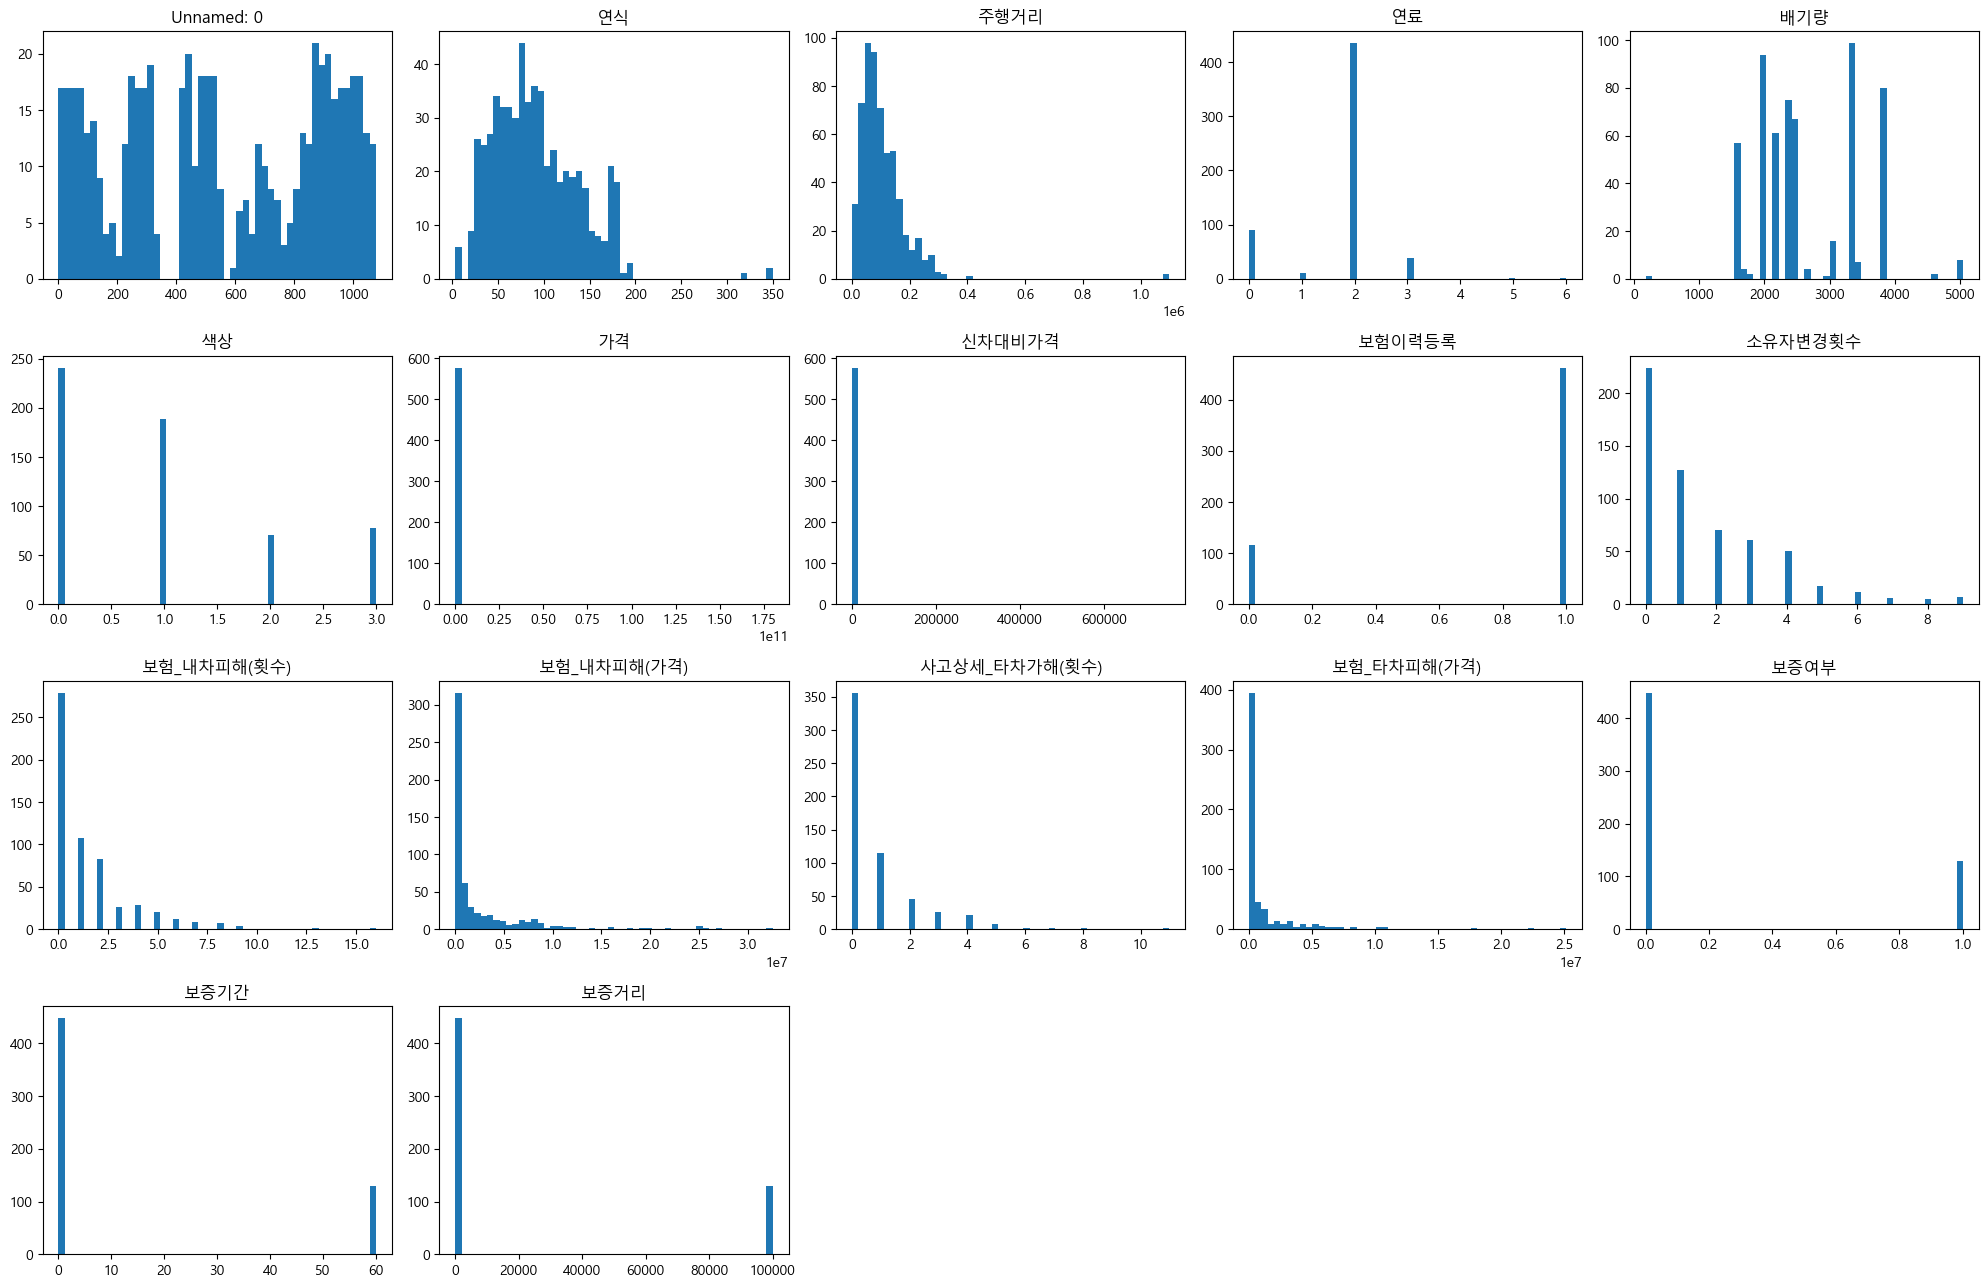

In [46]:
# 피처 각각에 대한 히스토그램 출력
fig = plt.figure(figsize = (20, 16))

# df의 열 개수 만큼의 subplot을 출력
for i in range(len(df_dropped.columns)):
    ax = fig.add_subplot(5, 5, i + 1)
    plt.hist(df_dropped[df_dropped.columns[i]], bins = 50)
    ax.set_title(df_dropped.columns[i])
    
plt.tight_layout()
plt.show()

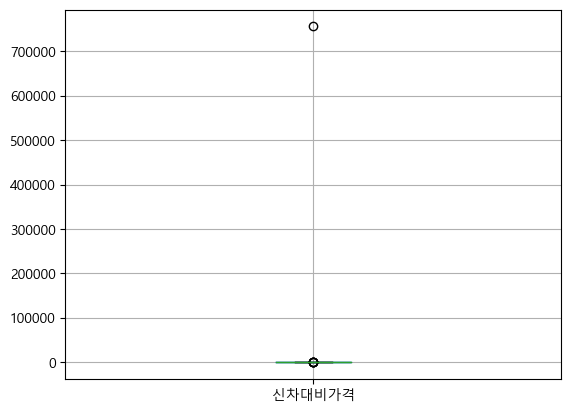

In [47]:
# 신차대비가격 컬럼 이상치확인
df_dropped.boxplot(column = '신차대비가격')
plt.show()

In [48]:
# 700000 넘는 데이터 이상치로 판단하여 제거
df_dropped.drop(df_dropped[df_dropped['신차대비가격']>700000].index, inplace = True)

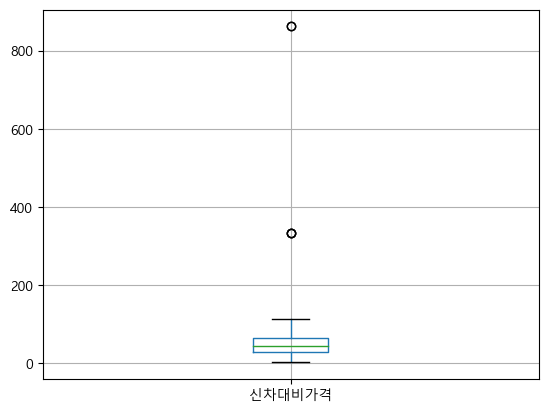

In [49]:
df_dropped.boxplot(column = '신차대비가격')
plt.show()

In [50]:
# 200 넘는 데이터 이상치로 판단하여 제거
df_dropped.drop(df_dropped[df_dropped['신차대비가격']>200].index, inplace = True)

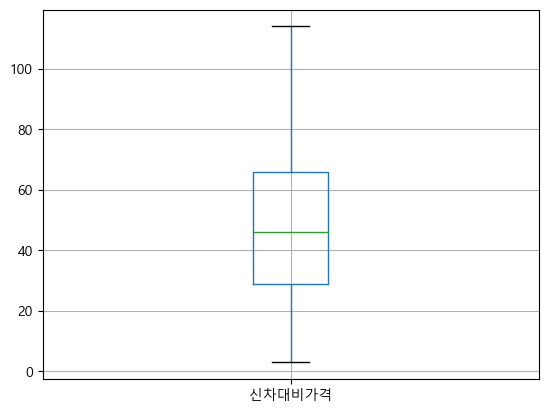

In [51]:
df_dropped.boxplot(column = '신차대비가격')
plt.show()

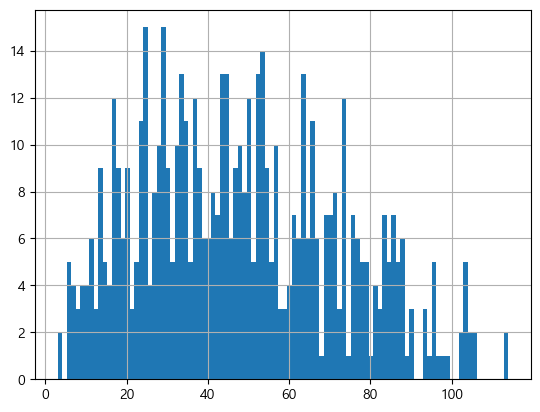

In [52]:
# 신차대비가격 분포 히스토그램
df_dropped["신차대비가격"].hist(bins = 100)
plt.show()

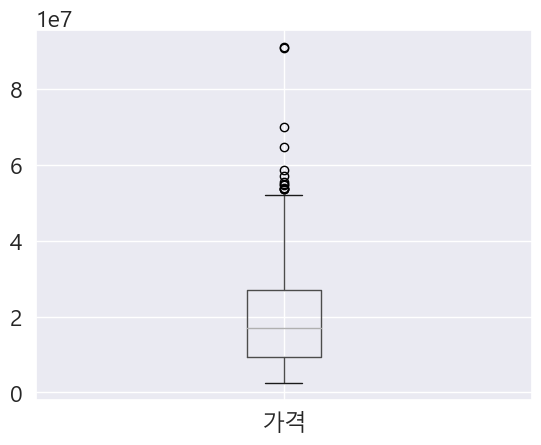

In [228]:
# 가격 컬럼 이상치확인
df_dropped.boxplot(column = '가격')
plt.show()

In [233]:
# 61000000 넘는 데이터 이상치로 판단하여 제거
df_dropped.drop(df_dropped[df_dropped['가격']>61000000].index, inplace = True)

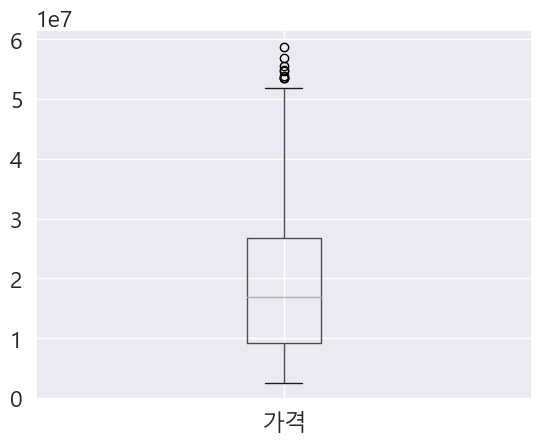

In [234]:
df_dropped.boxplot(column = '가격')
plt.show()

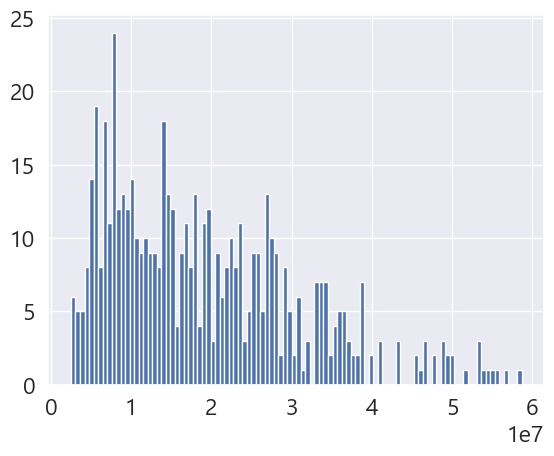

In [235]:
# 가격 분포 히스토그램
df_dropped["가격"].hist(bins = 100)
plt.show()

##### 비교적 고르게 분포되어있음 확인

In [236]:
# 결측치/이상치 제거데이터 새로운 파일로 저장

df_dropped.to_csv('cars_final.csv', index=False)

### 스케일링

In [237]:
df = pd.read_csv('cars_final.csv')

df.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,보험이력등록,소유자변경횟수,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,1,99,229350,3,2359,0,7700000,20.0,1,3.0,4.0,8129148.0,0.0,0.0,0,0,0
1,2,97,115435,0,2199,0,9990000,29.0,1,1.0,2.0,916288.0,1.0,1356217.0,0,0,0
2,4,93,98564,3,2359,3,14500000,39.0,1,3.0,0.0,0.0,0.0,0.0,0,0,0
3,5,29,22500,2,2497,1,29300000,86.0,1,2.0,2.0,250000.0,1.0,1428690.0,0,0,0
4,6,46,135027,2,2497,3,26990000,65.0,0,0.0,0.0,0.0,0.0,0.0,1,60,100000


In [238]:
df.shape

(568, 17)

In [239]:
# 표준화스케일링
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [240]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [241]:
df_scaled.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,보험이력등록,소유자변경횟수,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,-1.633543,0.158213,1.410291,1.498446,-0.374230,-0.946557,-0.960149,-1.144225,0.492837,0.696104,1.241284,1.275339,-0.560483,-0.403956,-0.533917,-0.533917,-0.533917
1,-1.630598,0.115824,0.117368,-2.087723,-0.583955,-0.946557,-0.767438,-0.771184,0.492837,-0.326890,0.281380,-0.321357,0.128596,0.049981,-0.533917,-0.533917,-0.533917
2,-1.624708,0.031046,-0.074116,1.498446,-0.374230,1.944004,-0.387908,-0.356695,0.492837,0.696104,-0.678523,-0.524194,-0.560483,-0.403956,-0.533917,-0.533917,-0.533917
3,-1.621763,-1.325407,-0.937434,0.303057,-0.193343,0.016963,0.857556,1.591407,0.492837,0.184607,0.281380,-0.468852,0.128596,0.074239,-0.533917,-0.533917,-0.533917
4,-1.618818,-0.965099,0.339735,0.303057,-0.193343,1.944004,0.663163,0.720979,-2.029068,-0.838387,-0.678523,-0.524194,-0.560483,-0.403956,1.872949,1.872949,1.872949


### 상관계수확인

C:\Users\PC\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


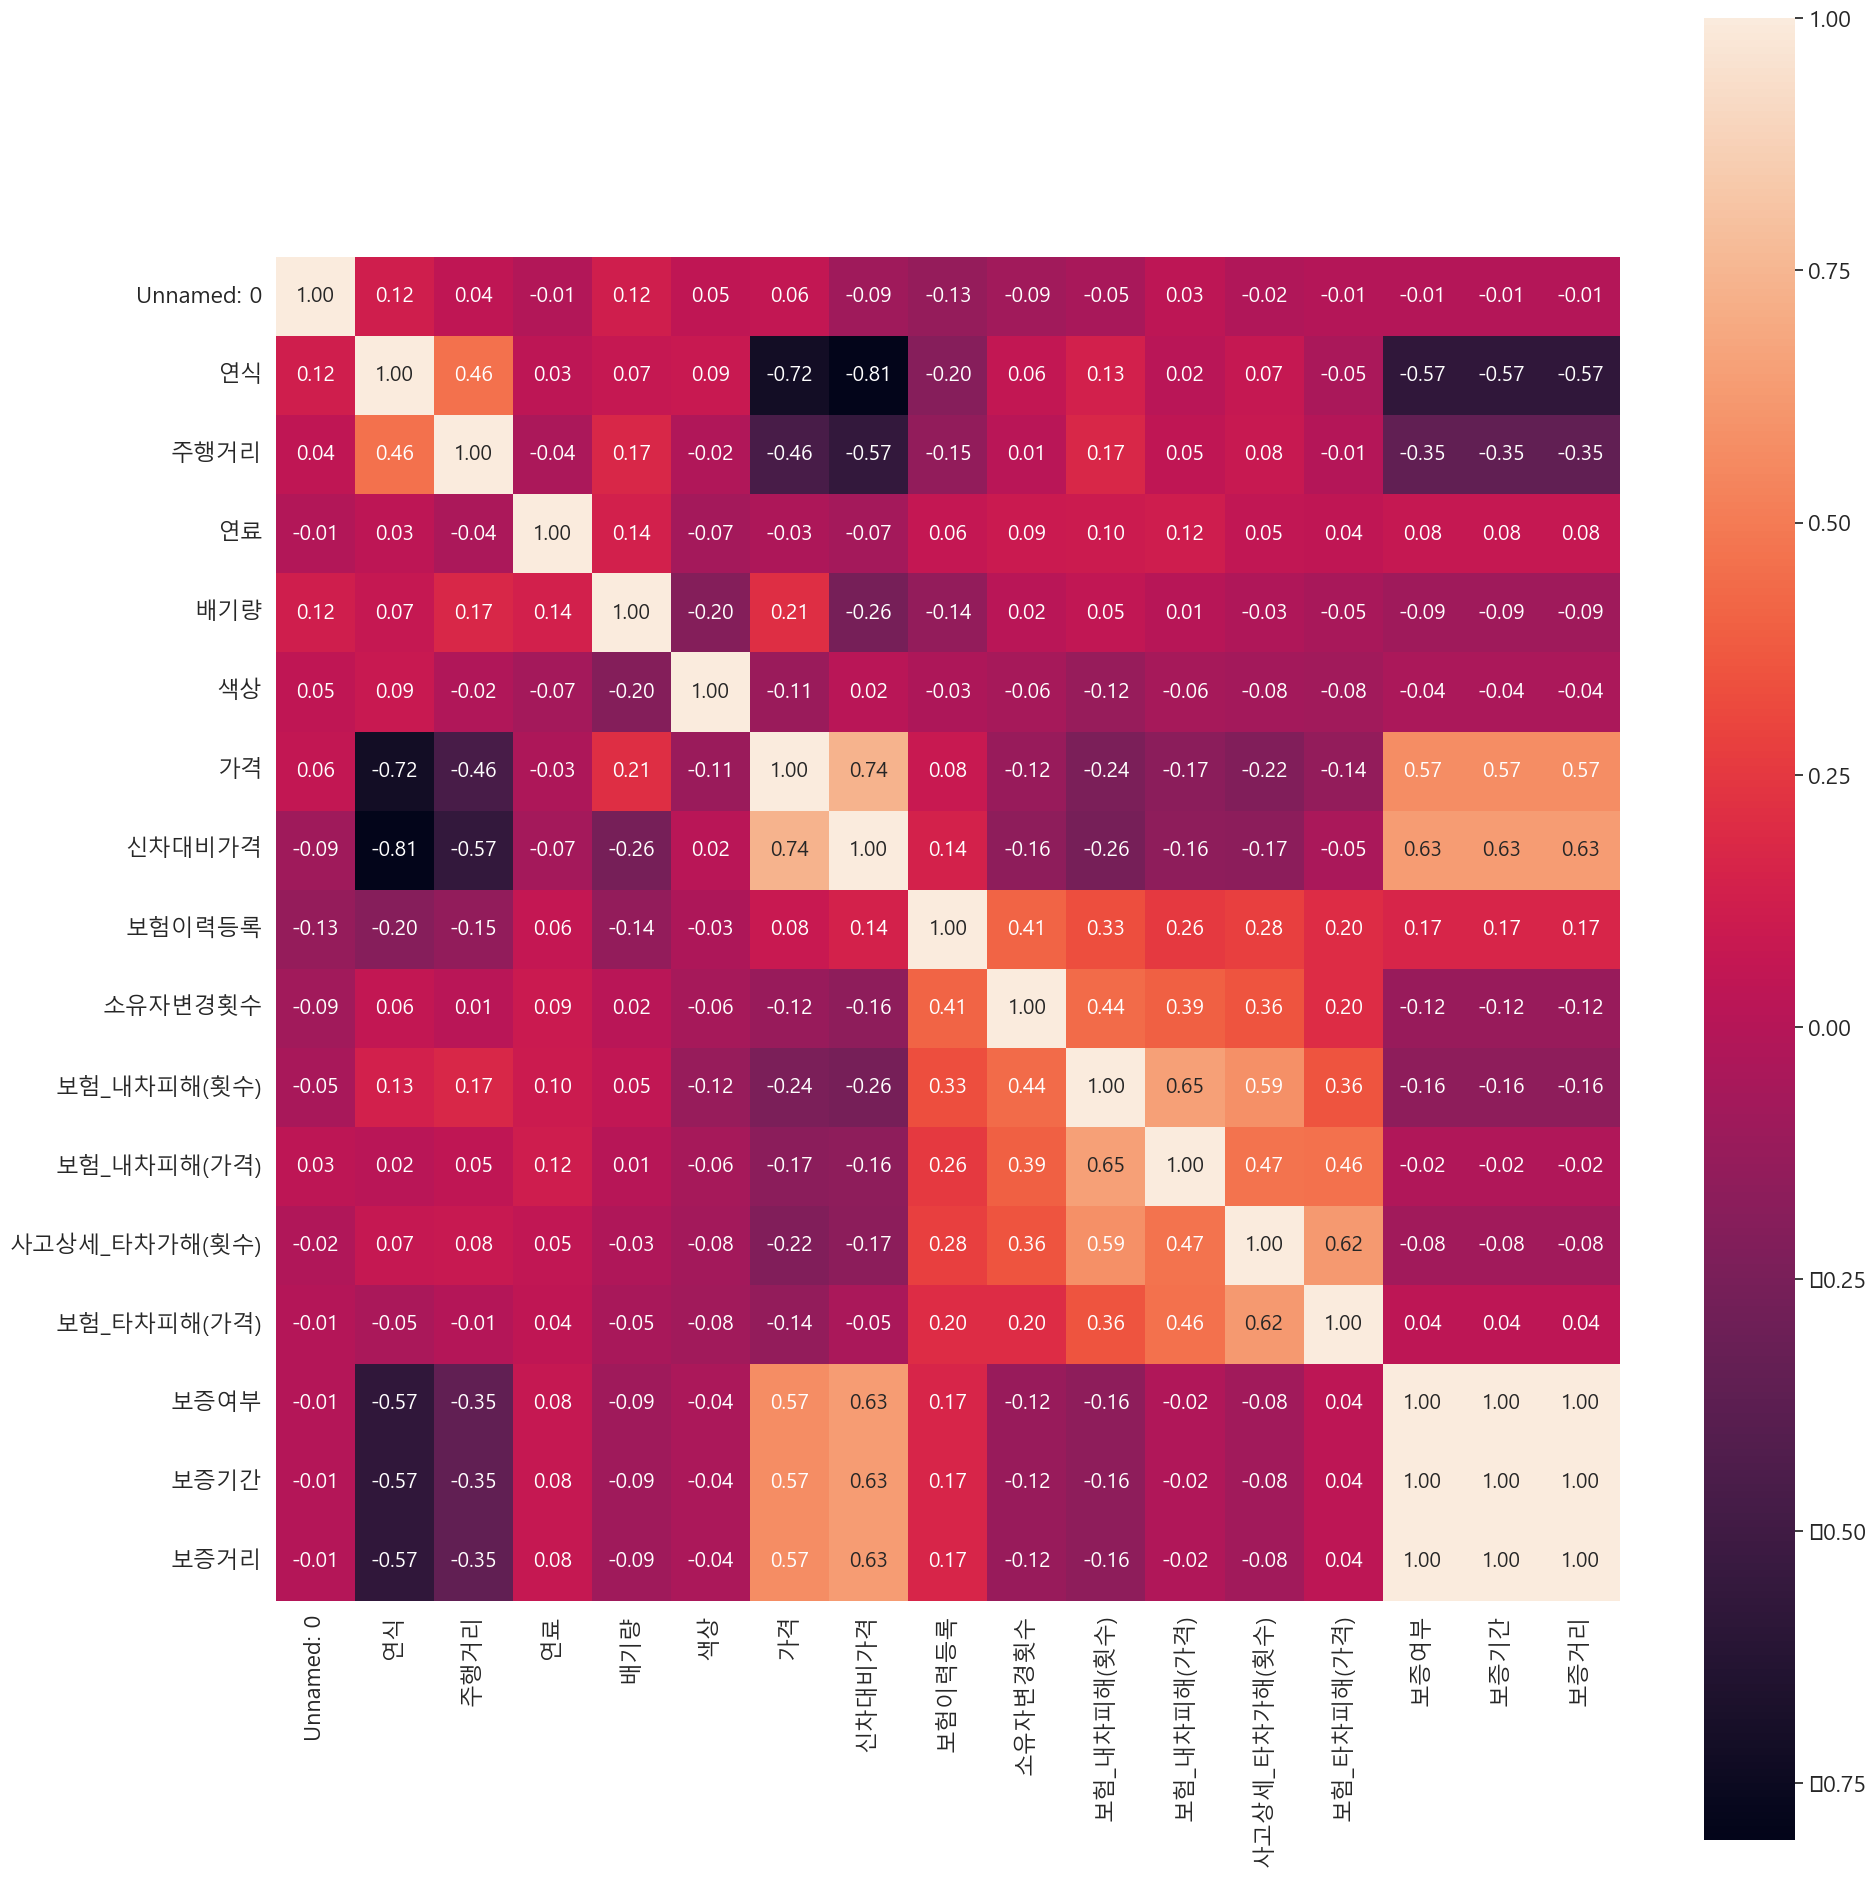

In [242]:
# 피처들의 상관관계 시각화 
plt.figure(figsize = (20, 20))
corr = df_scaled.corr()
sns.set(font_scale = 1.5, font = "Malgun Gothic")
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                annot_kws = {"size" : 15}, yticklabels = df_scaled.columns, xticklabels = df_scaled.columns)

plt.tight_layout()
plt.show()

### 데이터분할

In [270]:
# 신차대비가격 컬럼과 상관계수가 높은 컬럼10개 추출하여 x에 저장
# 종속변수 신차대비가격 y에 저장
x = df_scaled[['연식', '주행거리', '가격', '소유자변경횟수', '보험_내차피해(횟수)', '보험_내차피해(가격)', '사고상세_타차가해(횟수)', '보증여부', '보증기간', '보증거리']]
y = df_scaled['신차대비가격']

In [271]:
x.head()

,연식,주행거리,가격,소유자변경횟수,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보증여부,보증기간,보증거리
0,0.158213,1.410291,-0.960149,0.696104,1.241284,1.275339,-0.560483,-0.533917,-0.533917,-0.533917
1,0.115824,0.117368,-0.767438,-0.326890,0.281380,-0.321357,0.128596,-0.533917,-0.533917,-0.533917
2,0.031046,-0.074116,-0.387908,0.696104,-0.678523,-0.524194,-0.560483,-0.533917,-0.533917,-0.533917
3,-1.325407,-0.937434,0.857556,0.184607,0.281380,-0.468852,0.128596,-0.533917,-0.533917,-0.533917
4,-0.965099,0.339735,0.663163,-0.838387,-0.678523,-0.524194,-0.560483,1.872949,1.872949,1.872949


In [272]:
y.head()

0   -1.144225
1   -0.771184
2   -0.356695
3    1.591407
4    0.720979
Name: 신차대비가격, dtype: float64

In [273]:
print(x.shape)
print(y.shape)

(568, 10)
(568,)


In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

## 모델 훈련 및 평가 후 결정

###### 선형회귀

In [248]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [249]:
# 과소적합확인 : 훈련데이터 평가치 > 테스트데이터 평가치 이므로 과소적합 아님
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train))

0.7685577993048374
0.7577905471203362


In [250]:
lr_pred = lr.predict(x_test)

In [251]:
# 모델평가
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mae

0.3666866653886778

In [252]:
lr_r2 = r2_score(y_test, lr_pred)
lr_r2

0.7685577993048374

###### 릿지회귀

In [253]:
rid = Ridge()
rid.fit(x_train, y_train)

Ridge()

In [254]:
# 과소적합확인 : 훈련데이터 평가치 > 테스트데이터 평가치 이므로 과소적합 아님
print(rid.score(x_test, y_test))
print(rid.score(x_train, y_train))

0.7684839314949934
0.7577890360623205


In [255]:
rid_pred = rid.predict(x_test)

In [256]:
# 모델평가
rid_mae = mean_absolute_error(y_test, rid_pred)
rid_mae

0.36690559289661673

In [257]:
rid_r2 = r2_score(y_test, rid_pred)
rid_r2

0.7684839314949934

###### 라쏘회귀

In [258]:
las = Lasso()
las.fit(x_train, y_train)

Lasso()

In [259]:
# 과소적합확인 : 훈련데이터 평가치 > 테스트데이터 평가치 이므로 과소적합 아님
print(las.score(x_test, y_test))
print(las.score(x_train, y_train))

-0.03924824853271058
0.0


In [260]:
las_pred = las.predict(x_test)

In [261]:
# 모델평가
las_mae = mean_absolute_error(y_test, las_pred)
las_mae

0.8608966659998135

In [262]:
las_r2 = r2_score(y_test, las_pred)
las_r2

-0.03924824853271058

###### 랜덤포레스트

In [263]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [264]:
# 과소적합확인 : 훈련데이터 평가치 > 테스트데이터 평가치 이므로 과소적합 아님
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

0.8782810835865255
0.9858734010498408


In [265]:
rf_pred = rf.predict(x_test)

In [266]:
# 모델평가
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mae

0.24976641851588194

In [267]:
rf_r2 = r2_score(y_test, rf_pred)
rf_r2

0.8782810835865255

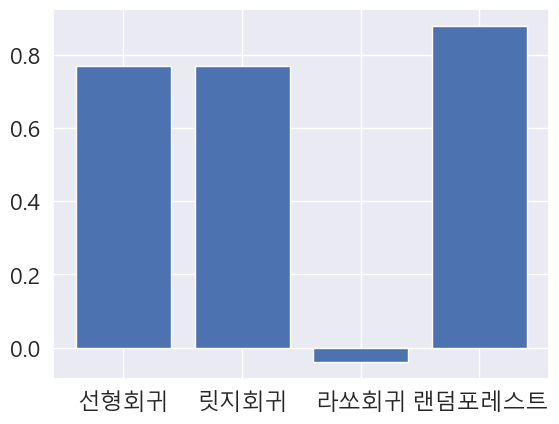

In [268]:
x = np.arange(4)
years = ["선형회귀", "릿지회귀", "라쏘회귀", "랜덤포레스트"]
values = [lr_r2, rid_r2, las_r2, rf_r2]

plt.bar(x, values)
plt.xticks(x, years)
plt.show()

##### 랜덤포레스트로 모델 결정

## 데이터분석

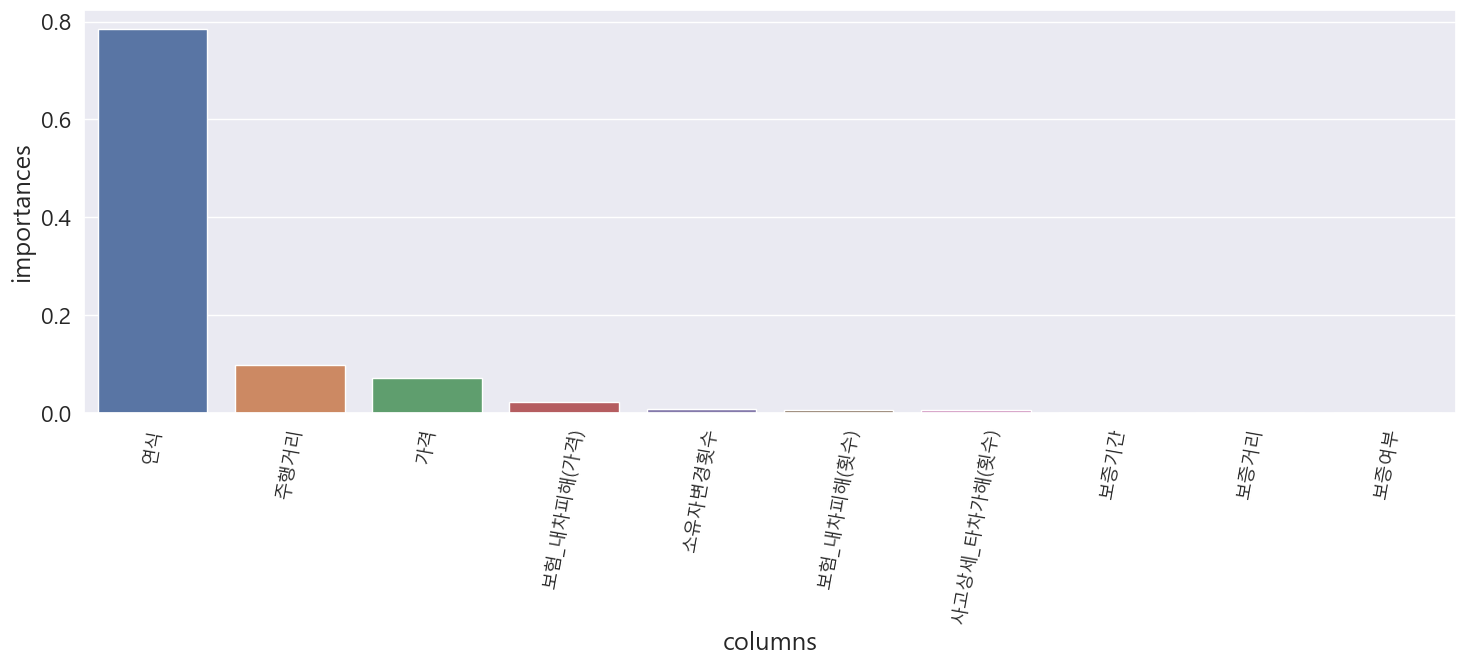

In [275]:
# 변수중요도 그림 출력
feature_importance = rf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns': x.columns, 'importances': feature_importance})
df_fi = df_fi[df_fi['importances'] > 0]  # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15, 7))
ax = sns.barplot(x='columns', y='importances', data=df_fi)
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

#### 상위4개 (연식, 주행거리, 가격, 보험_내차피해(가격))의 부분의존도 그림 출력

In [276]:
df.head()

,Unnamed: 0,연식,주행거리,연료,배기량,색상,가격,신차대비가격,보험이력등록,소유자변경횟수,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보험_타차피해(가격),보증여부,보증기간,보증거리
0,1,99,229350,3,2359,0,7700000,20.0,1,3.0,4.0,8129148.0,0.0,0.0,0,0,0
1,2,97,115435,0,2199,0,9990000,29.0,1,1.0,2.0,916288.0,1.0,1356217.0,0,0,0
2,4,93,98564,3,2359,3,14500000,39.0,1,3.0,0.0,0.0,0.0,0.0,0,0,0
3,5,29,22500,2,2497,1,29300000,86.0,1,2.0,2.0,250000.0,1.0,1428690.0,0,0,0
4,6,46,135027,2,2497,3,26990000,65.0,0,0.0,0.0,0.0,0.0,0.0,1,60,100000


In [277]:
# 데이터 해석을 위해 스케일링 전 데이터로 부분의존도 그림 출력
x = df[['연식', '주행거리', '가격', '소유자변경횟수', '보험_내차피해(횟수)', '보험_내차피해(가격)', '사고상세_타차가해(횟수)', '보증여부', '보증기간', '보증거리']]
y = df['신차대비가격']

In [278]:
x.head()

,연식,주행거리,가격,소유자변경횟수,보험_내차피해(횟수),보험_내차피해(가격),사고상세_타차가해(횟수),보증여부,보증기간,보증거리
0,99,229350,7700000,3.0,4.0,8129148.0,0.0,0,0,0
1,97,115435,9990000,1.0,2.0,916288.0,1.0,0,0,0
2,93,98564,14500000,3.0,0.0,0.0,0.0,0,0,0
3,29,22500,29300000,2.0,2.0,250000.0,1.0,0,0,0
4,46,135027,26990000,0.0,0.0,0.0,0.0,1,60,100000


In [279]:
y.head()

0    20.0
1    29.0
2    39.0
3    86.0
4    65.0
Name: 신차대비가격, dtype: float64

In [280]:
x1 = x.values
y1 = y.values

In [281]:
model = RandomForestRegressor()

In [282]:
model.fit(x1,y1)

RandomForestRegressor()

In [283]:
def partial_depedence_plot(model, data, feature_idx, feature_names):
    x = sorted(data[:, feature_idx])
    avg_predicted_value = [] 
    for val in x:
        data_rep = data.copy()
        data_rep[:, feature_idx] = val
        avg_predicted_value.append(np.mean(model.predict(data_rep)))

    fig = plt.figure(figsize=(15, 7))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    plt.plot(x, avg_predicted_value)
    plt.ylabel('Partial Dependency')
    plt.show()

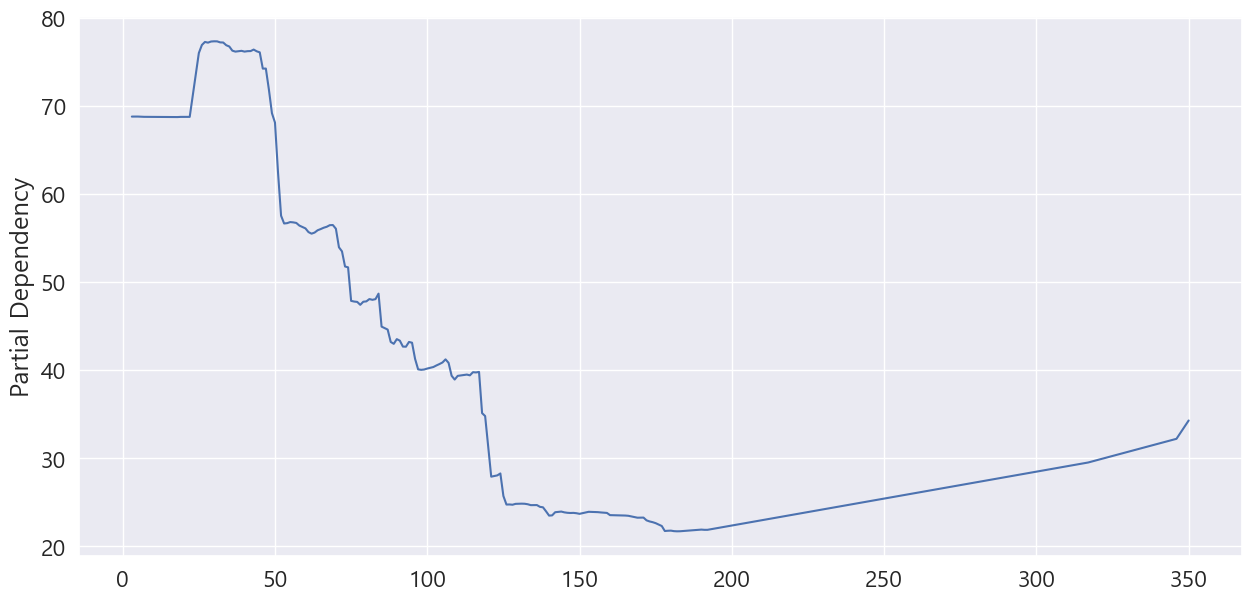

In [284]:
# 연식
data = x1
feature_idx = 0
feature_names = x1
partial_depedence_plot(model, data, feature_idx, feature_names)

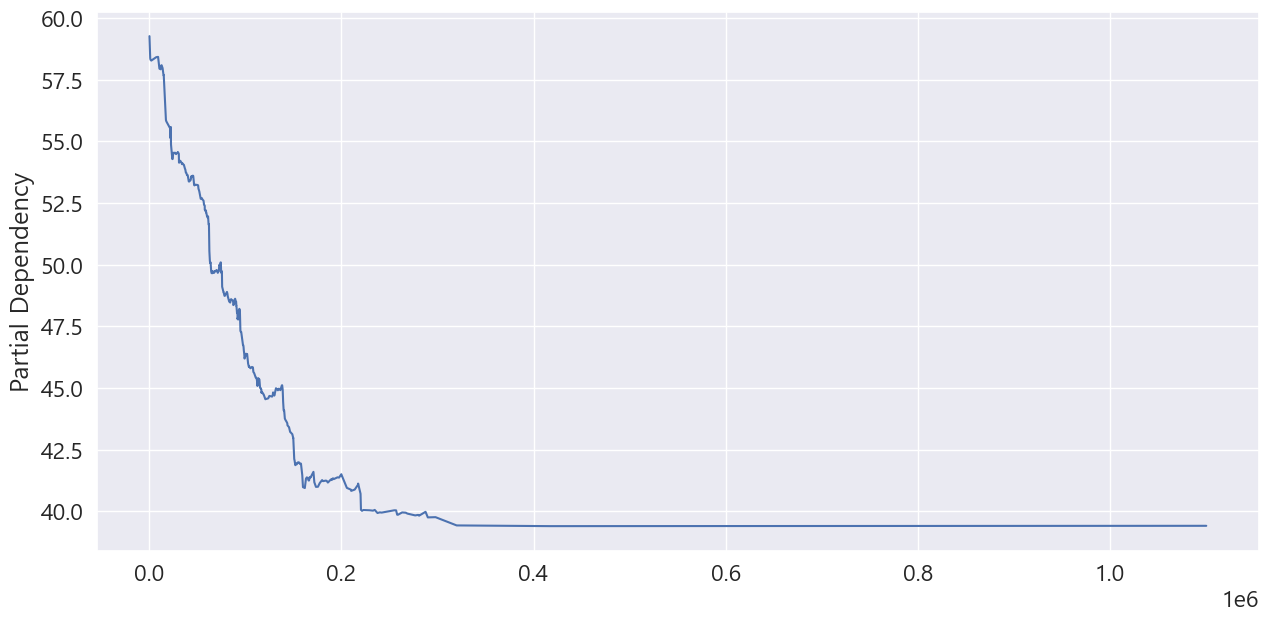

In [285]:
# 주행거리
data = x1
feature_idx = 1
feature_names = x1
partial_depedence_plot(model, data, feature_idx, feature_names)

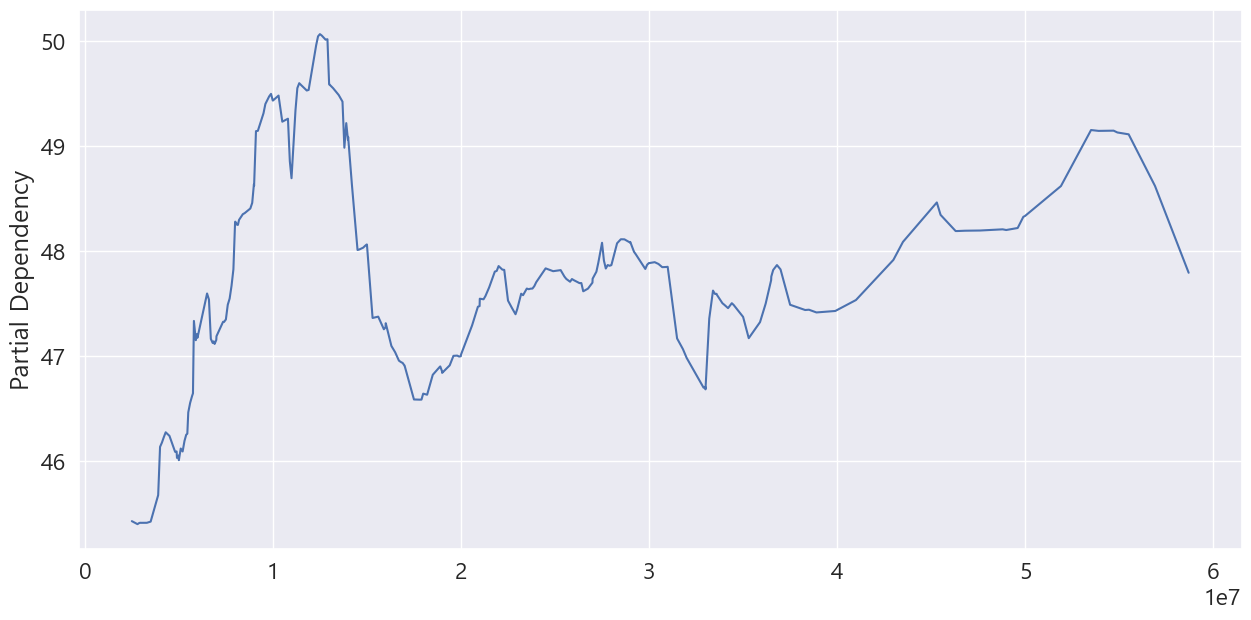

In [286]:
# 가격
data = x1
feature_idx = 2
feature_names = x1
partial_depedence_plot(model, data, feature_idx, feature_names)

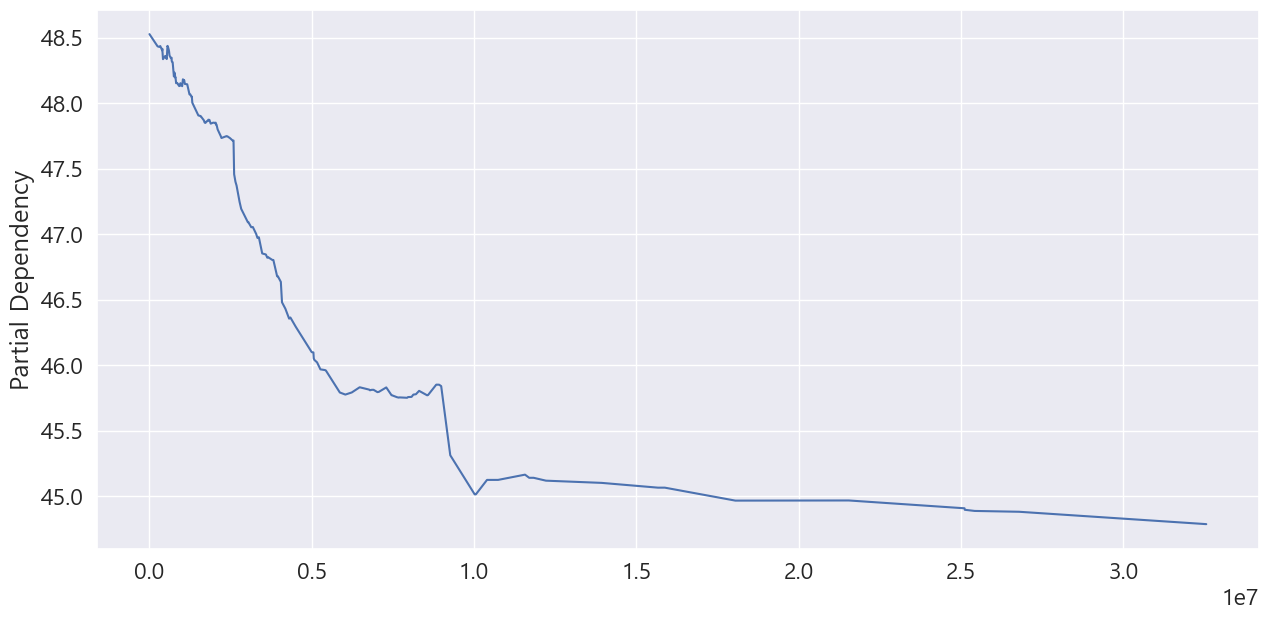

In [287]:
# 보험_내차피해(가격)
data = x1
feature_idx = 5
feature_names = x1
partial_depedence_plot(model, data, feature_idx, feature_names)

# 분석결과

- 연식, 주행거리, 가격, 보험_내차피해(가격) 순서로 신차대비중고차가격에 연관성이 높다.
- 일반적으로 연식이 길어질수록 중고차 가격이 낮아지지만, 약 180개월 이후로는 오래될 수록 높아지는 경향이 보인다.
    - 희소성가치로 생각된다.
- 주행거리가 짧을수록 중고차 가격이 높아진다.
- 일반적으로 신차 가격이 높을 수록 중고차 가격이 높아진다.
    - 중간중간 특별한 모델에따라 가격이 떨어지는 것으로 생각된다.
- 보험_내차피해(가격)이 적을수록 중고차 가격이 높아진다.